# Metrics learning. Практика.

В данном задании нам предстоит кластеризовать клиентов банка по характеру финансового поведения с продуктом банка (кредитная карта). 

### Самостоятельная работа

В качестве необязательного самостоятельного задания предлагаем уточнить портрет из каждого кластера, посмотрев на распределения по:

- количеству детей;
- размеру семьи;
- возрасту.

Вам предстоит самостоятельно решить реальную задачу кластеризации и понижения размерности на данных о кредитных картах. Вводные данные для задачи, предобработка и код, в котором необходимо выполнять задания, вы можете найти в ноутбуке.

## Загрузим необходимые данные и библиотеки

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.filterwarnings(action="ignore")

### Описание данных

CUSTID: Идентификационный номер держателя карты

BALANCE: Доступный для трат баланс

BALANCEFREQUENCY: Признак, показывающий как часто обновляется баланс, изменяется от 0 (никогда не обновляется) до 1 (очень часто обновляется)

PURCHASES: Количество покупок сделанное с карты

ONEOFFPURCHASES: Максимально поличество покупок «за раз»

INSTALLMENTSPURCHASES: Сумма покупок в рассрочку

CASHADVANCE: Сумма овердрафта

PURCHASESFREQUENCY: Признак, показывающий как часто делаются покупки с карты, изменяется от 0 (никогда не используется) до 1 (постоянно используется)

ONEOFFPURCHASESFREQUENCY: Признак, показывающий как часто Покупки происходят за один раз, изменяется от 0 (редко покупаются) до 1 (часто покупаются)

PURCHASESINSTALLMENTSFREQUENCY: Признак, показывающий как часто Покупки происходят в рассрочку, изменяется от 0 (редко покупаются) до 1 (часто покупаются)

CASHADVANCEFREQUENCY: Как часто платится овердрафтом

CASHADVANCETRX: Количество оплат в овердрафте

PURCHASESTRX: Количество транзакций покупок

CREDITLIMIT: Лимит кредита по карте

PAYMENTS: Задолженность по карте

MINIMUM_PAYMENTS: Минимальный платеж по задолженности

PRCFULLPAYMENT: Платеж для беспроцентного периода

TENURE: Стоимость обслуживания карты

В ноутбуке вы увидите пропущенные строки, которые вам надо восстановить и ответить на вопросы по заданию. В работе присутствует четыре задания в коде (8.1-8.4) и одно задание на платформе с выбором ответа (8.5).  

In [24]:
data= pd.read_csv("data/CC GENERAL.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Обработка данных

Посмотрим на статистики, вызвав метод desribe.

In [25]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Видим много выбросов, постараемся избавится от них, сделав диапазоны значений для различных колонок.

## Работа с пропусками

### Задание 8.1
Выведите количество пропусков. количество пропусков в признаке `MINIMUM_PAYMENTS` используйте как ответ на задание 8.1

In [26]:
#Ваш код здесь
n_missing = data['MINIMUM_PAYMENTS'].isna().sum()
print(f"Количество пропусков: {n_missing}")


Количество пропусков: 313


Заполните значения `MINIMUM_PAYMENTS`, `CREDIT_LIMIT` средним значением:

In [27]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean() # ваш код здесь  
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']= data['CREDIT_LIMIT'].mean() #ваш код 

Проверим еще раз, что пропусков более нет

In [28]:
# ваш код здесь
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## Работа с выбросами

Для работы с выбросами сделаем диапазоновые значения признаков, для этого будем использовать функцию

In [29]:
# Функция преобразует непрерывные числовые признаки в категориальные путем разбиения на диапазоны.
def add_range(df, columns, range_list, onesided = True):
    for column in columns:
        name = column + '_range'
        df[name] = 0
        for i in range(len(range_list)-1):
            df.loc[(df[column] > range_list[i])&(df[column] <= range_list[i+1]), name] = i+1
            if onesided:
                df.loc[(df[column] >range_list[-1]), name] = len(range_list)
    df.drop(columns, axis = 1, inplace = True)

In [30]:
add_range(data,['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS'], [0,500,1000,3000,5000,10000])

In [31]:
add_range(data,['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'] , np.linspace(0,1,11),onesided=False)

In [32]:
add_range(data,['PURCHASES_TRX', 'CASH_ADVANCE_TRX'] ,[0,5,10,15,20,30,50,100] ,onesided=False)

In [33]:
data.drop(['CUST_ID'], axis=1, inplace=True)

X= np.asarray(data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   TENURE                                  8950 non-null   int64
 1   BALANCE_range                           8950 non-null   int64
 2   PURCHASES_range                         8950 non-null   int64
 3   ONEOFF_PURCHASES_range                  8950 non-null   int64
 4   INSTALLMENTS_PURCHASES_range            8950 non-null   int64
 5   CASH_ADVANCE_range                      8950 non-null   int64
 6   CREDIT_LIMIT_range                      8950 non-null   int64
 7   PAYMENTS_range                          8950 non-null   int64
 8   MINIMUM_PAYMENTS_range                  8950 non-null   int64
 9   BALANCE_FREQUENCY_range                 8950 non-null   int64
 10  PURCHASES_FREQUENCY_range               8950 non-null   int64
 11  ONEOFF_PURCHASES_

### Стандартизация данных

In [35]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

Определимся с количеством кластеров

### Задание 8.2
Используя `KElbowVisualizer` из модуля `yellowbrick.cluster` определите оптимальное количество кластеров. Для этого на вход `KElbowVisualizer` подайте модель `Kmeans`, максимальное количество кластеров следует ограничить до `k=20`. Ответом на задание является количество кластеров. 

In [36]:
from yellowbrick.cluster import KElbowVisualizer

#ваш код

Для корректной работы в дальнейшем предлагается внести ответ в качестве переменной

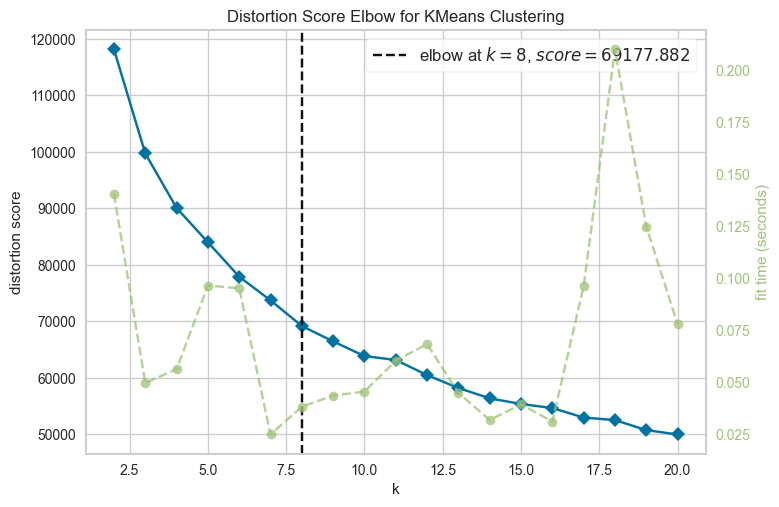

Оптимальное количество кластеров: 8
Значение метрики при оптимальном k: 69177.88151752202


In [50]:
#kmeans = KMeans(random_state=42)
kmeans = KMeans()


Elbow_M = KElbowVisualizer(
    kmeans, 
    k=20,
    metric='distortion',  # или 'inertia'
    timings=True  # показать время вычислений
)

#Elbow_M = KElbowVisualizer(kmeans, k=20)
Elbow_M.fit(X)
Elbow_M.show()

k_clust = Elbow_M.elbow_value_ # сюда вставить ответ на задачу 8.2
print(f"Оптимальное количество кластеров: {k_clust}")

print(f"Значение метрики при оптимальном k: {Elbow_M.elbow_score_}")


k_clust = 8 # Почему-то в эталонном ответе 8, у меня от 8 до 10

## Кластеризация

Обучите модель `Kmeans`с количеством кластеров, полученном в задании 6.2, с помощью метода

In [44]:
kmean= KMeans(k_clust)
kmean.fit(X) 
labels=kmean.labels_

In [45]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_range,PURCHASES_range,ONEOFF_PURCHASES_range,INSTALLMENTS_PURCHASES_range,CASH_ADVANCE_range,CREDIT_LIMIT_range,PAYMENTS_range,MINIMUM_PAYMENTS_range,BALANCE_FREQUENCY_range,PURCHASES_FREQUENCY_range,ONEOFF_PURCHASES_FREQUENCY_range,PURCHASES_INSTALLMENTS_FREQUENCY_range,CASH_ADVANCE_FREQUENCY_range,PRC_FULL_PAYMENT_range,PURCHASES_TRX_range,CASH_ADVANCE_TRX_range,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,6
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,1
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,1


## Анализ результатов кластеризации

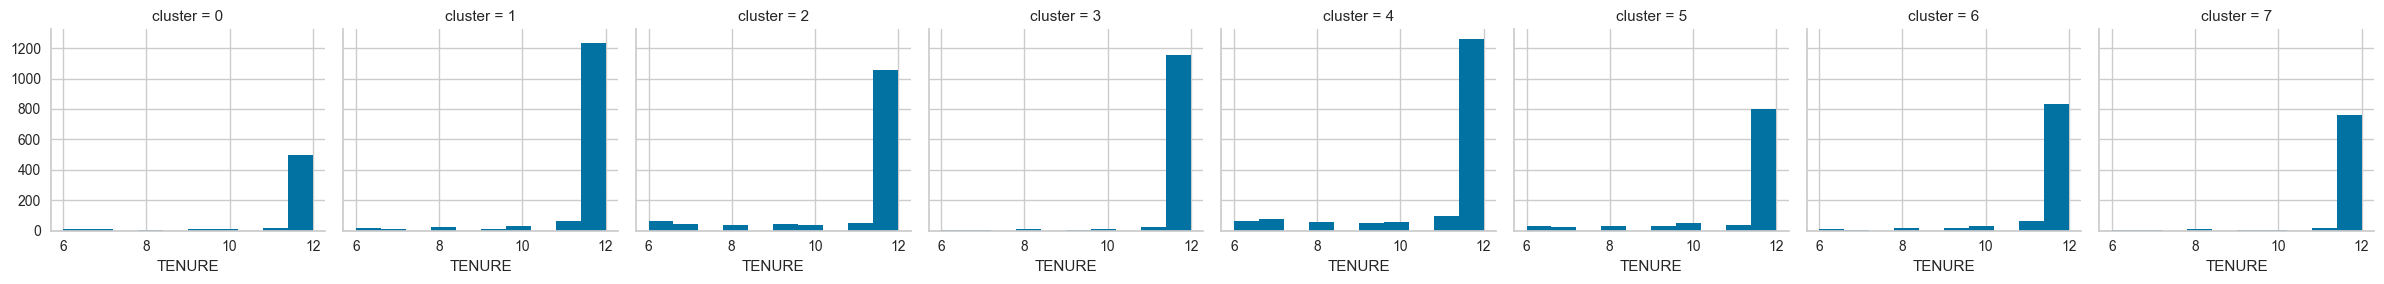

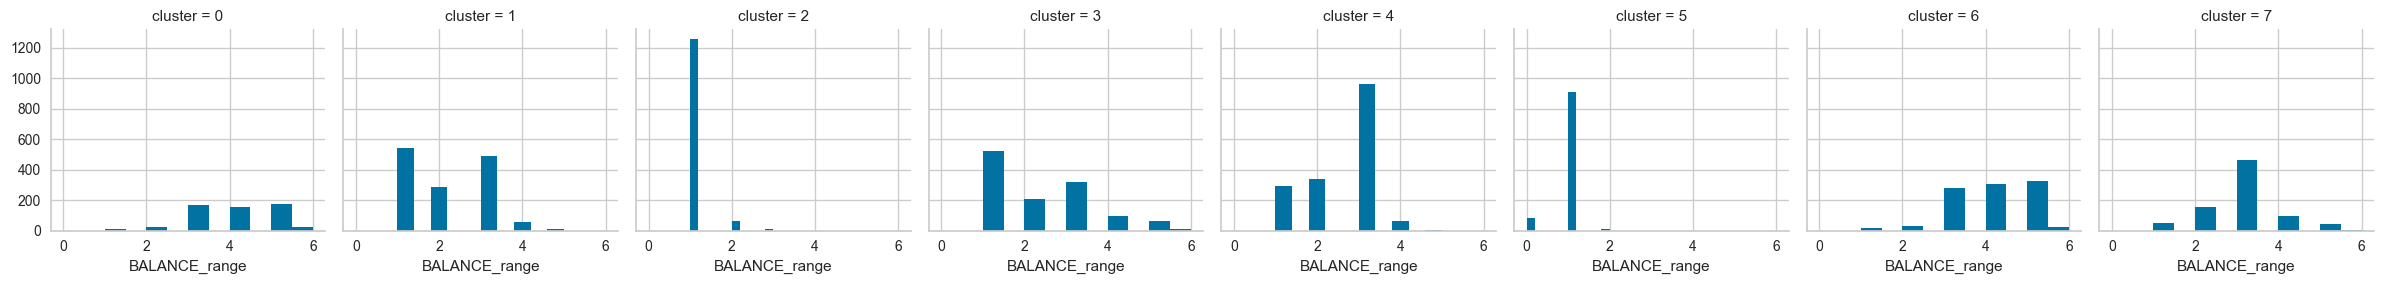

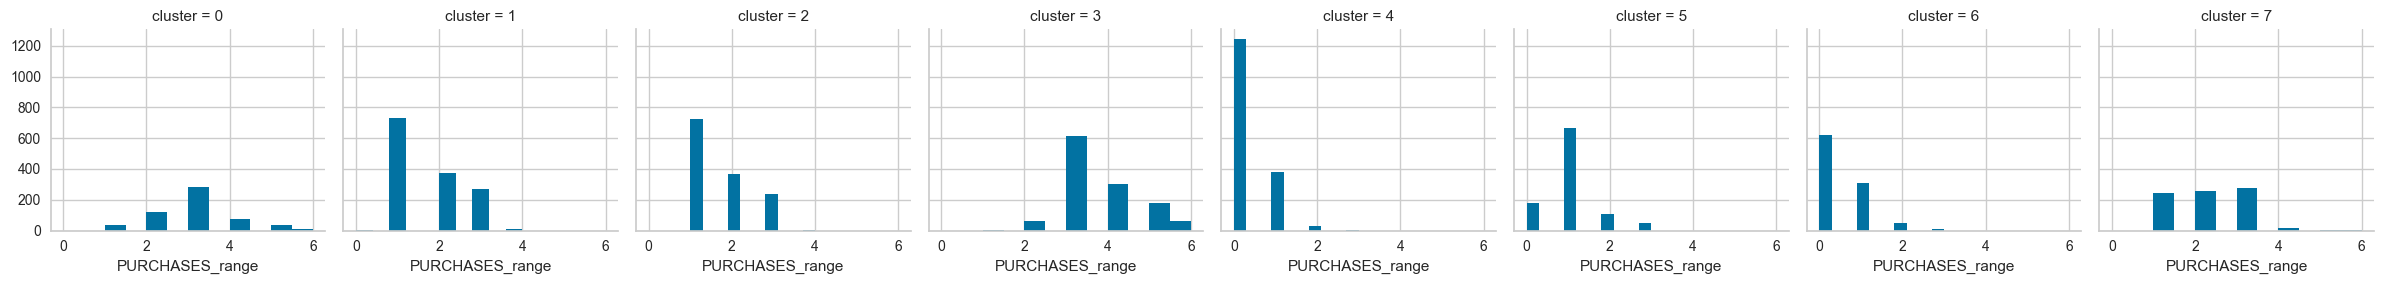

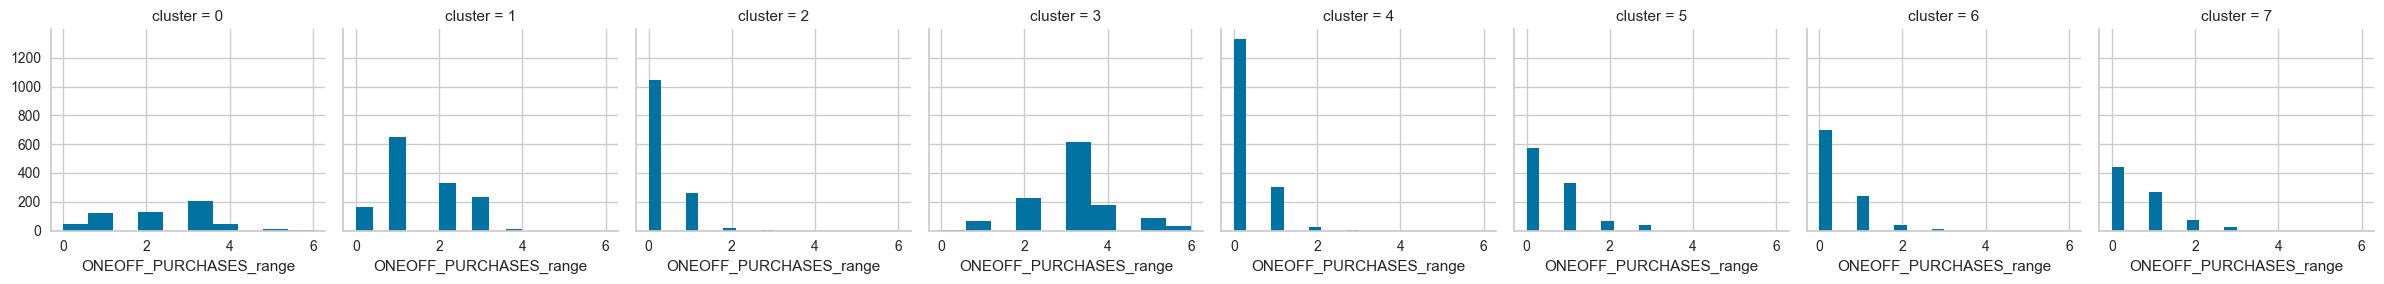

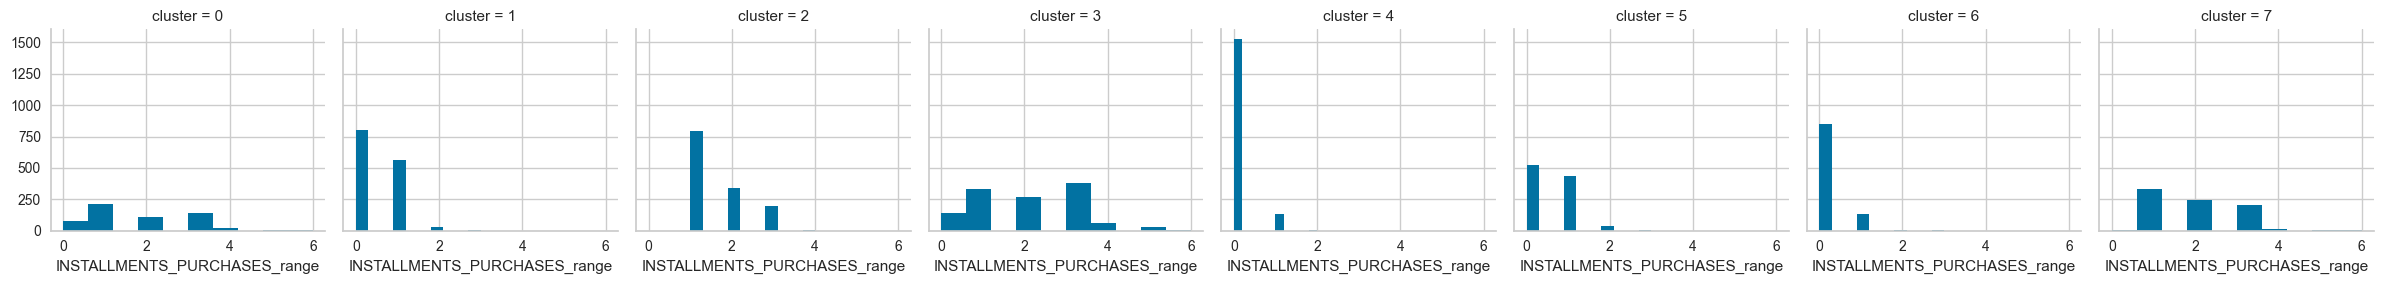

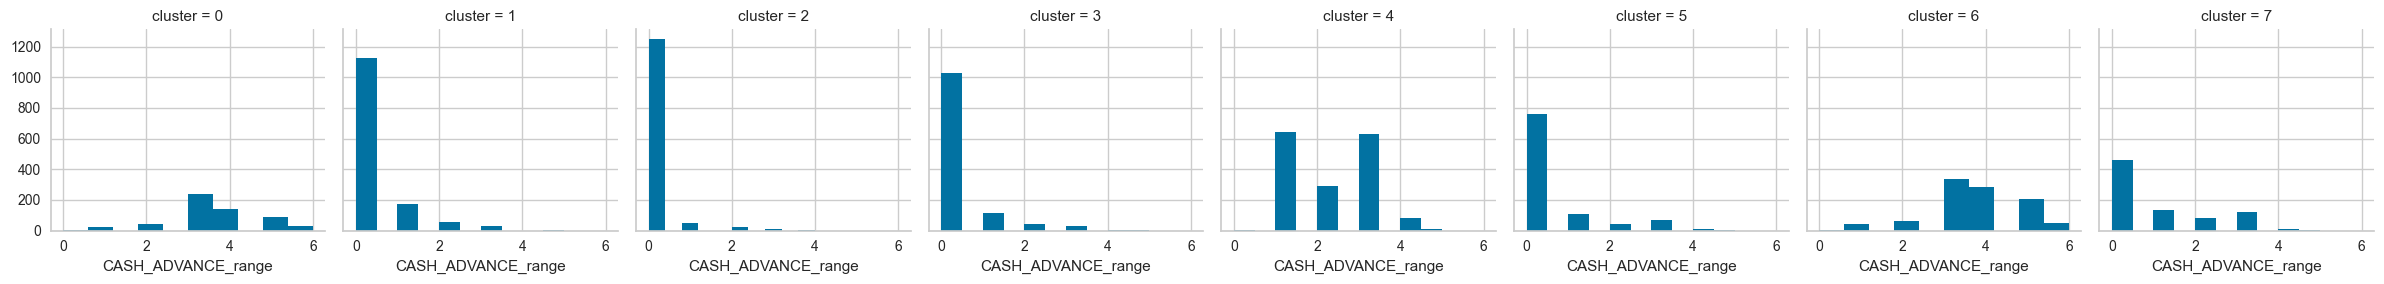

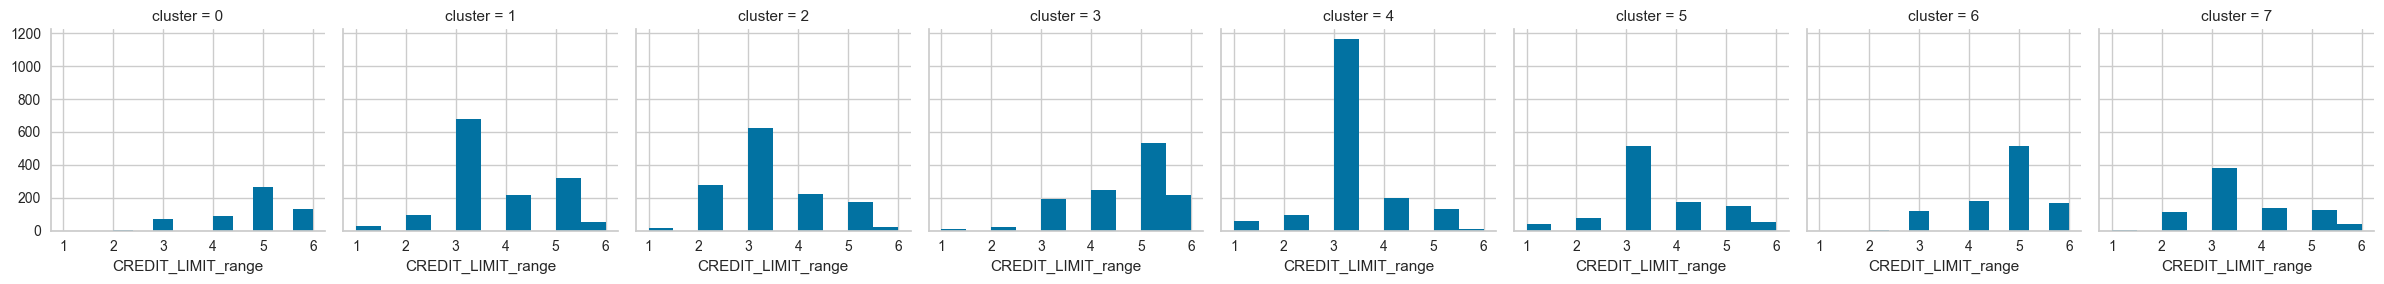

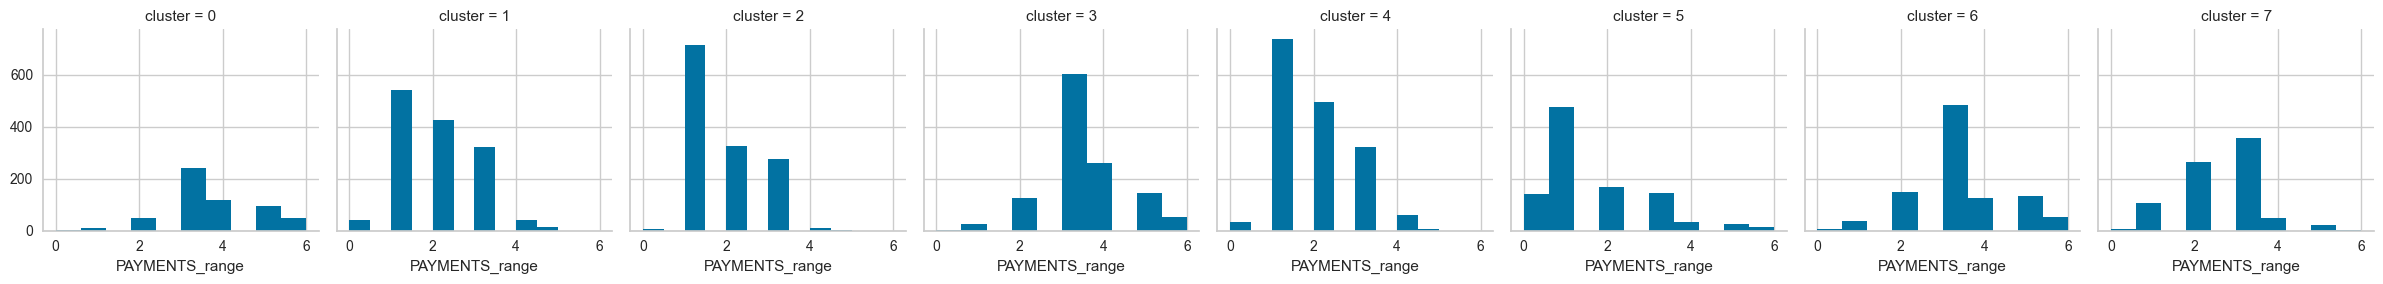

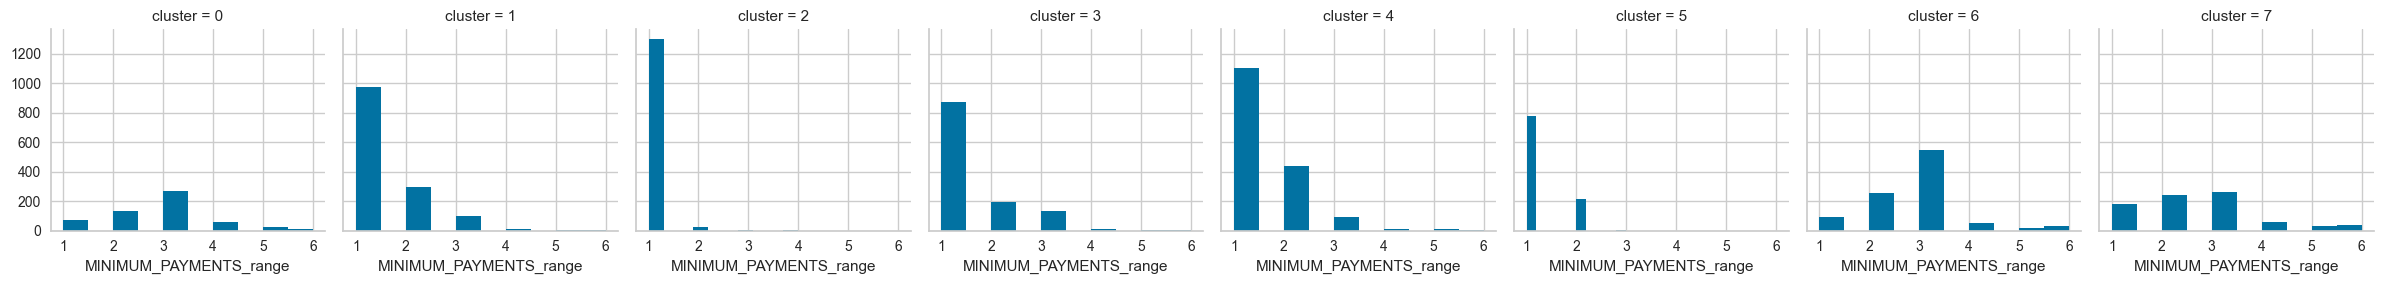

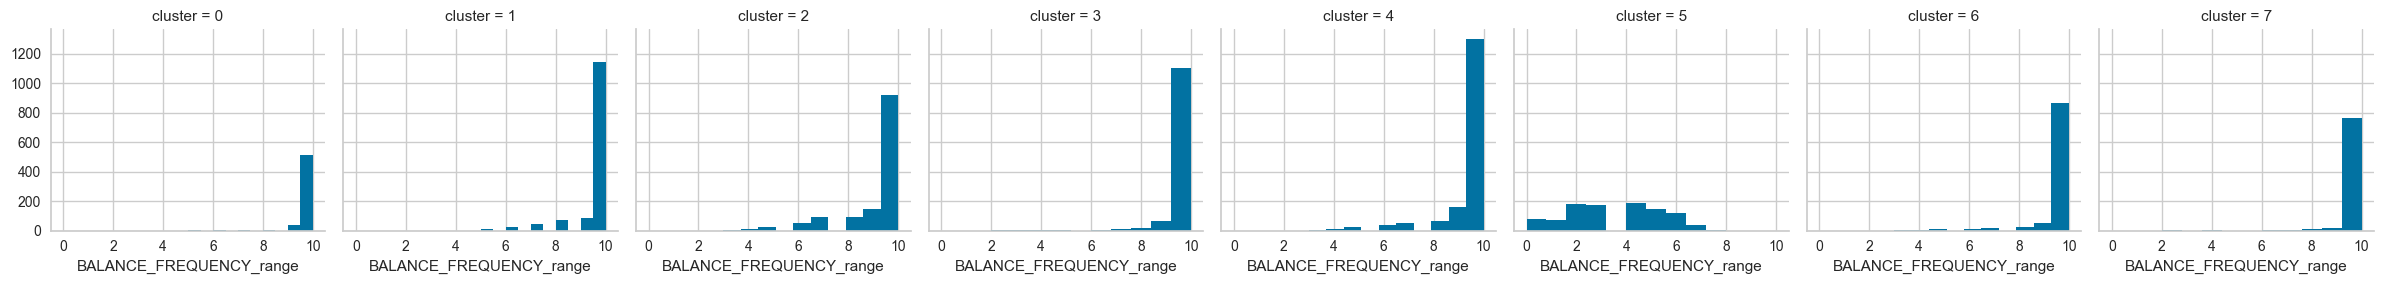

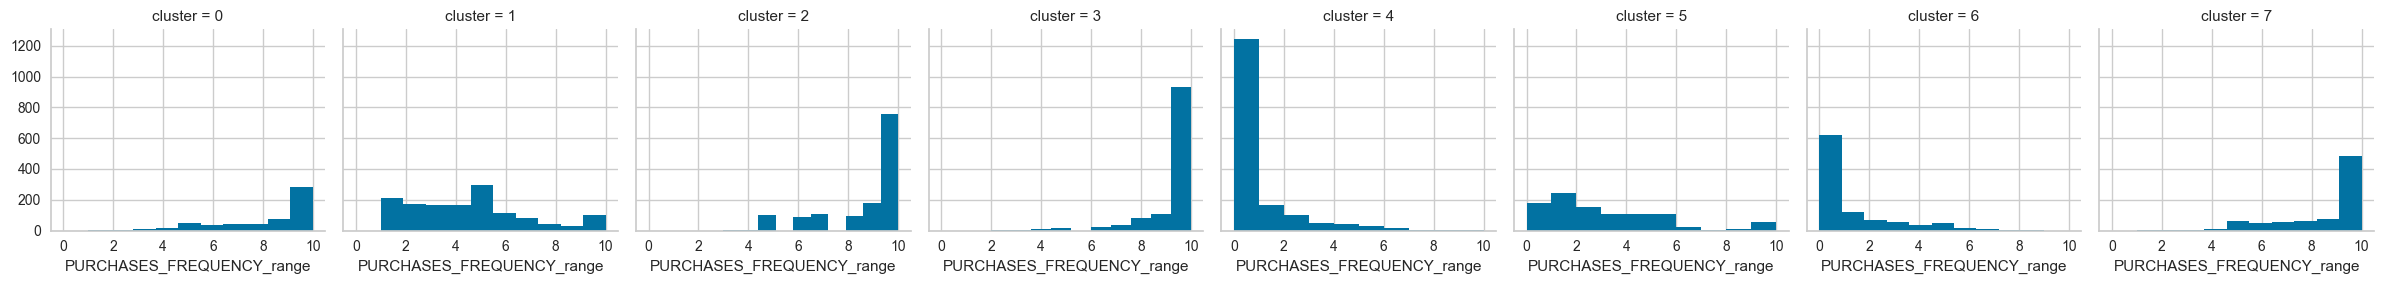

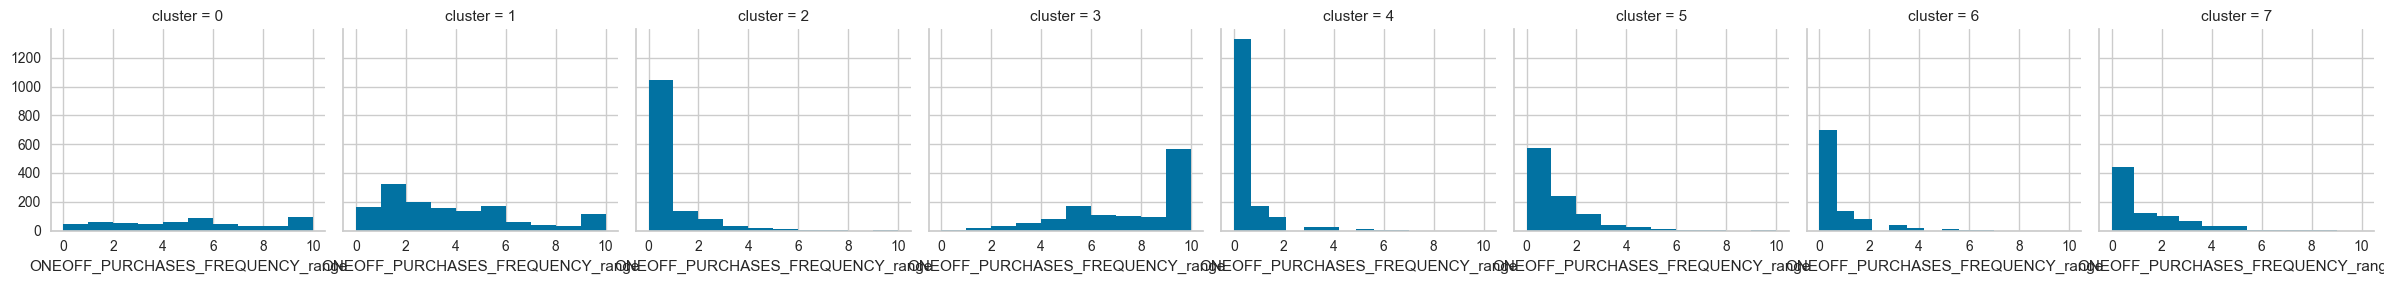

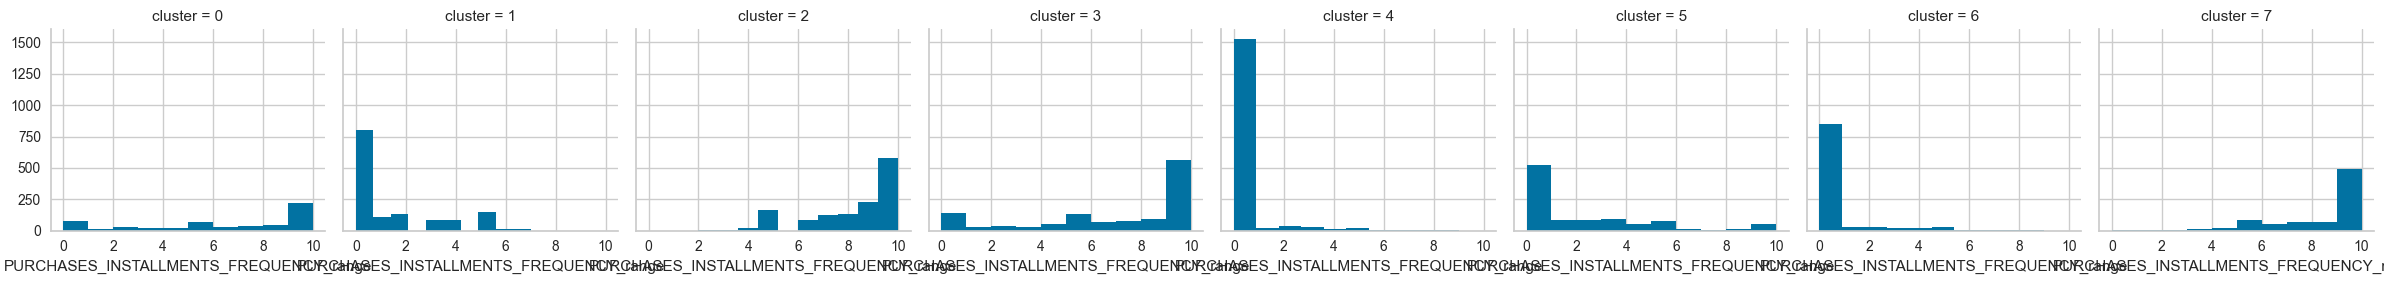

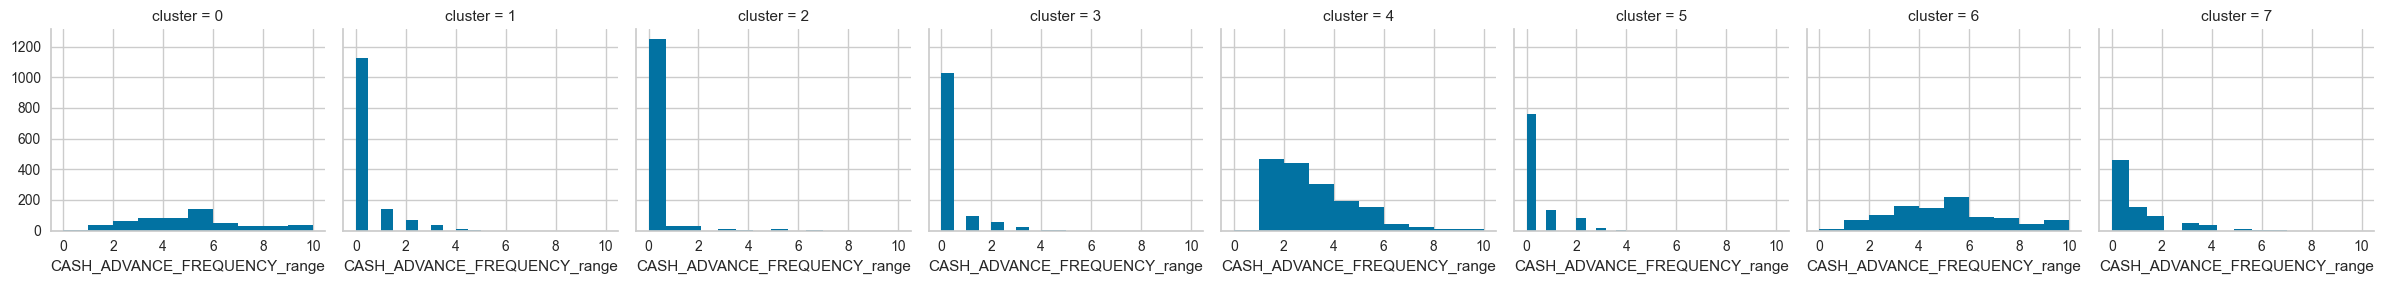

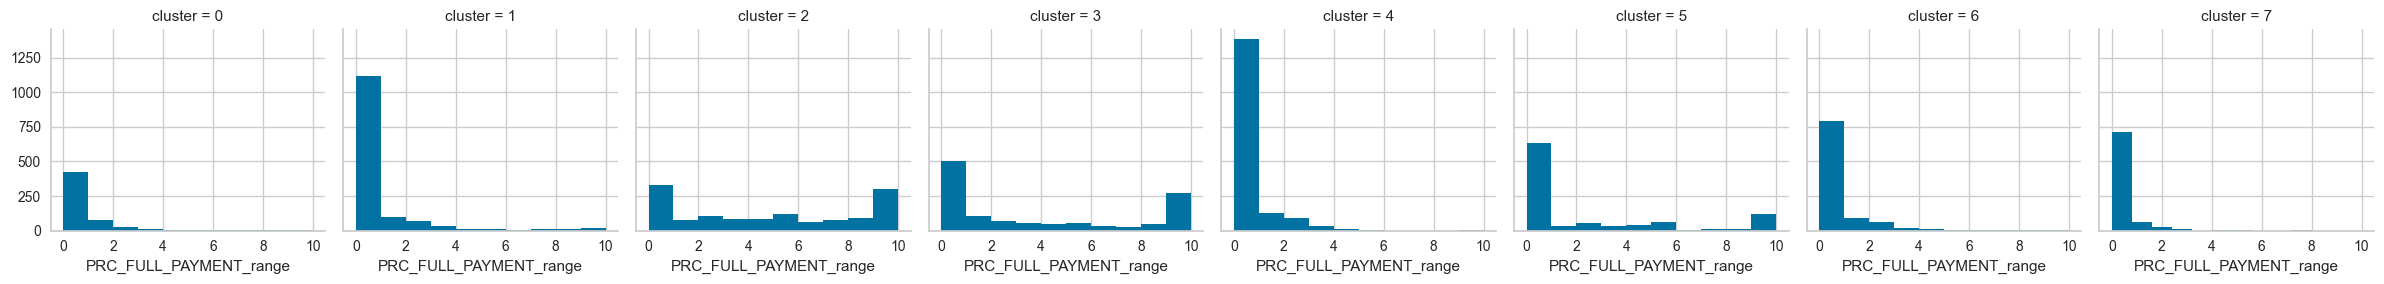

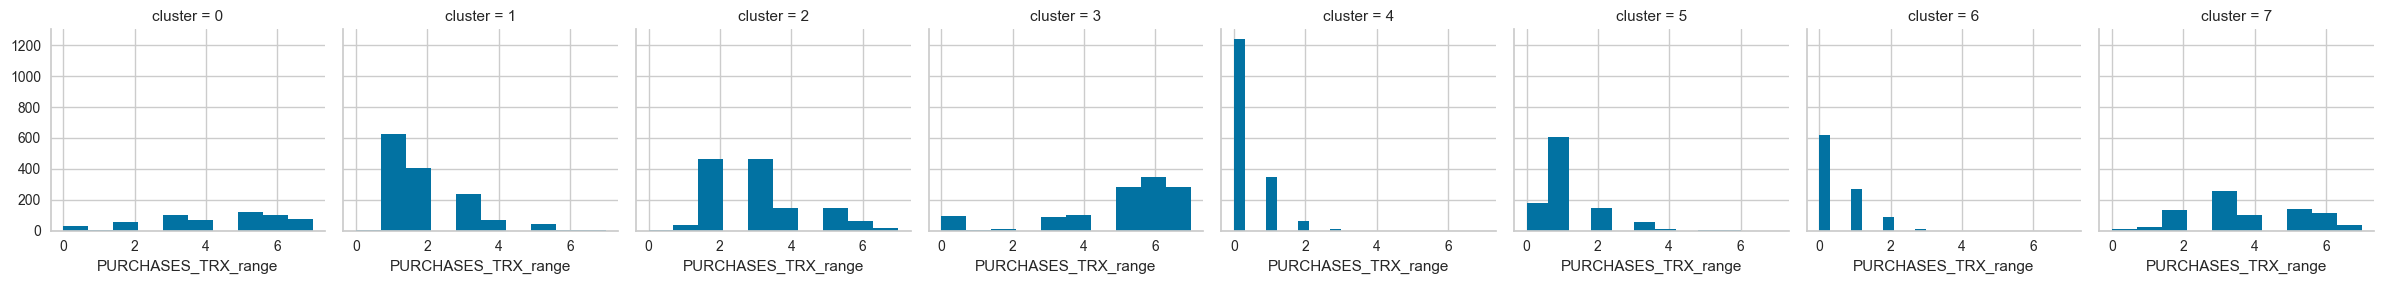

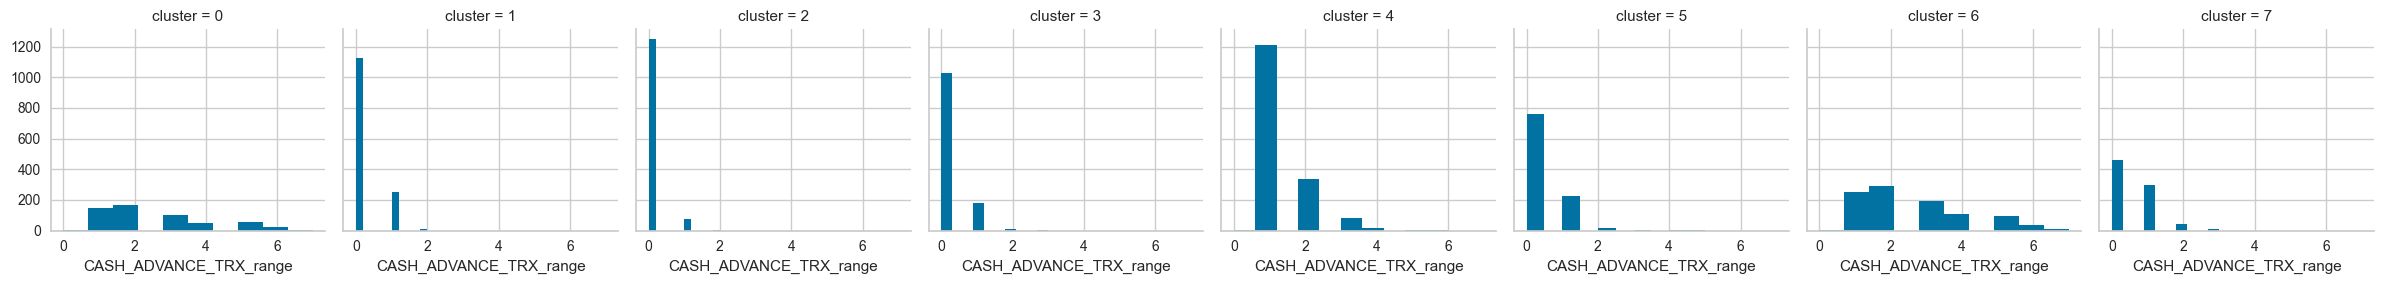

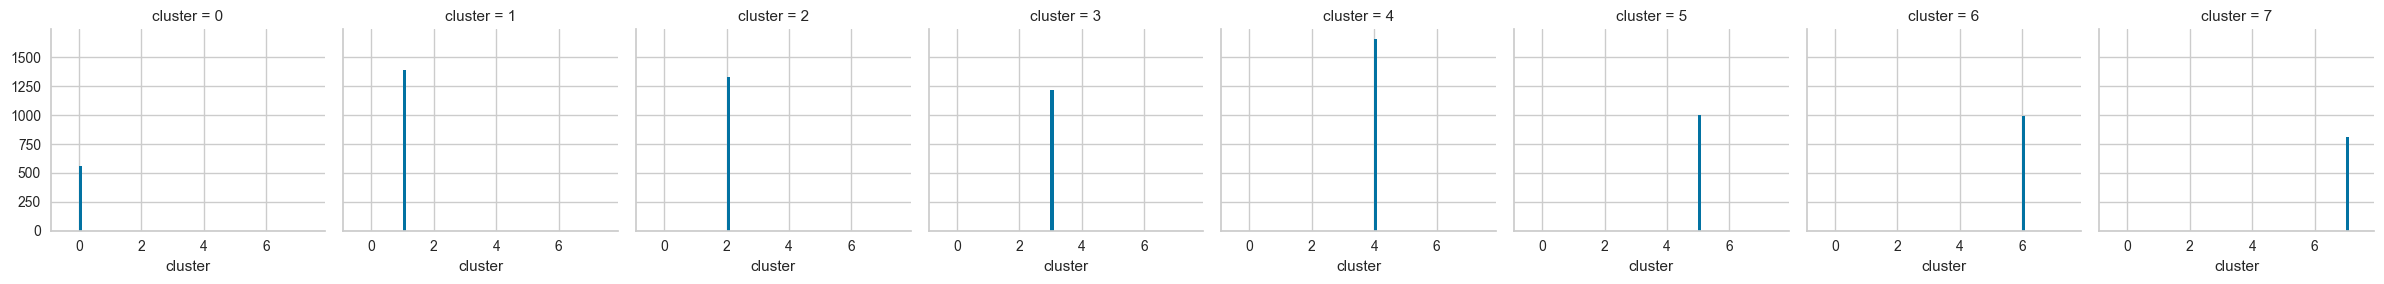

In [46]:
#раскомментируйте код для получения информации о распределениях признаков для каждого кластера
for c in clusters:
     grid= sns.FacetGrid(clusters, col='cluster')
     grid.map(plt.hist, c)

Можно модифицировать код так, чтобы все графики отображались на одном полотне. Для этого создадим сетку subplots, где каждый ряд будет соответствовать признаку, а каждая колонка — кластеру. 

In [52]:
features = [col for col in clusters.columns if col != 'cluster']  # Исключаем колонку с кластерами
clusters_list = sorted(clusters['cluster'].unique())

# Определяем размеры сетки графиков
n_features = len(features)
n_clusters = len(clusters_list)
fig, axes = plt.subplots(n_features, n_clusters, 
                         figsize=(3 * n_clusters, 2.5 * n_features),
                         squeeze=False)  # Гарантируем, что axes всегда 2D

# Настраиваем отступы
fig.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Строим гистограммы
for row_idx, feature in enumerate(features):
    for col_idx, cluster_id in enumerate(clusters_list):
        ax = axes[row_idx, col_idx]
        data = clusters[clusters['cluster'] == cluster_id][feature]
        sns.histplot(data, ax=ax, kde=False, bins='auto', color='skyblue')
        ax.set_title(f'{feature}\nCluster {cluster_id}', fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=8)

# Сохраняем в файл
plt.savefig('clusters_distribution.png', dpi=150, bbox_inches='tight')
plt.close()

#### Место для ваших выводов

## Выводы по распредению

На основе предоставленных визуализаций распределения различных признаков по восьми кластерам (от 0 до 7) можно сделать выводы о финансовом поведении клиентов банка, использующих кредитные карты. Гистограммы показывают частоту клиентов в определённых диапазонах каждого признака, что позволяет выявить закономерности и различия между кластерами. Ниже представлен детальный анализ распределений для каждого признака по кластерам:

---

### Анализ распределения признаков по кластерам

#### **Кластер 0**
- **TENURE (Стоимость обслуживания карты)**: В основном высокая (около 12), что указывает на долгосрочных держателей карт.
- **BALANCE_range (Диапазон баланса)**: В основном низкий (0–1), что говорит о низких остатках на карте.
- **PURCHASES_range (Диапазон покупок)**: Низкий (0–1), минимальная активность покупок.
- **ONEOFF_PURCHASES_range** и **INSTALLMENTS_PURCHASES_range**: Оба низкие (0–1), редкие покупки за раз или в рассрочку.
- **CASH_ADVANCE_range (Диапазон овердрафта)**: В основном 0, практически нет овердрафтов.
- **PURCHASES_FREQUENCY_range (Частота покупок)**: Низкая (0–2), покупки редкие.
- **CASH_ADVANCE_FREQUENCY_range (Частота овердрафта)**: Низкая (0–1), овердрафты редки.
- **PRC_FULL_PAYMENT_range (Полное погашение)**: Высокое (8–10), часто полностью погашают задолженность.
- **CREDIT_LIMIT_range (Кредитный лимит)**: Умеренный (2–4), приемлемый кредитный лимит.

**Вывод**: Этот кластер состоит из клиентов, которые минимально используют кредитные карты, поддерживают низкие остатки и часто полностью погашают задолженность. Вероятно, это осторожные пользователи, избегающие долгов.

**Название кластера**: *"Осторожные накопители"*

---

#### **Кластер 1**
- **TENURE**: Высокая (около 12), долгосрочные пользователи.
- **BALANCE_range**: Высокий (4–6), значительные остатки.
- **PURCHASES_range**: Низкий (0–1), минимальные покупки.
- **CASH_ADVANCE_range**: Высокий (4–6), частые овердрафты.
- **PURCHASES_FREQUENCY_range**: Очень низкая (0–1), редкие покупки.
- **CASH_ADVANCE_FREQUENCY_range**: Высокая (6–10), частые овердрафты.
- **PRC_FULL_PAYMENT_range**: Низкое (0–2), редко погашают полностью.
- **CREDIT_LIMIT_range**: Умеренный или высокий (3–5).

**Вывод**: Эти клиенты сильно зависят от овердрафтов, поддерживают высокие остатки и редко полностью погашают задолженность. Вероятно, они используют карту для управления денежным потоком, но испытывают трудности с выплатами.

**Название кластера**: *"Зависимые от овердрафта"*

---

#### **Кластер 2**
- **TENURE**: Высокая (около 12).
- **BALANCE_range**: Умеренный или высокий (2–5).
- **PURCHASES_range**: Умеренный (2–4), заметная активность покупок.
- **ONEOFF_PURCHASES_range**: Умеренный (2–4), некоторые разовые покупки.
- **INSTALLMENTS_PURCHASES_range**: Низкий (0–1), минимальные покупки в рассрочку.
- **CASH_ADVANCE_range**: Умеренный (2–4), некоторые овердрафты.
- **PURCHASES_FREQUENCY_range**: Умеренная (4–6), покупки совершаются с некоторой регулярностью.
- **ONEOFF_PURCHASES_FREQUENCY_range**: Умеренная (4–6), частые разовые покупки.
- **PRC_FULL_PAYMENT_range**: Низкое (0–2), редко погашают полностью.
- **CREDIT_LIMIT_range**: Умеренный или высокий (3–5).

**Вывод**: Эти клиенты используют карты для покупок (особенно разовых) и некоторых овердрафтов. Они поддерживают умеренные или высокие остатки, но не погашают задолженность полностью, что указывает на возможное накопление долгов.

**Название кластера**: *"Разовые траты"*

---

#### **Кластер 3**
- **TENURE**: Высокая (около 12).
- **BALANCE_range**: Умеренный (2–4).
- **PURCHASES_range**: Высокий (4–6), значительная активность покупок.
- **INSTALLMENTS_PURCHASES_range**: Высокий (4–6), частые покупки в рассрочку.
- **CASH_ADVANCE_range**: Низкий (0–1), минимальные овердрафты.
- **PURCHASES_FREQUENCY_range**: Высокая (8–10), очень частые покупки.
- **PURCHASES_INSTALLMENTS_FREQUENCY_range**: Высокая (8–10), частые покупки в рассрочку.
- **PRC_FULL_PAYMENT_range**: Умеренное (4–6), иногда погашают полностью.
- **CREDIT_LIMIT_range**: Высокий (4–6).

**Вывод**: Эти клиенты активно используют карты, часто совершая покупки, особенно в рассрочку. Они хорошо управляют своими остатками и иногда полностью погашают задолженность, что указывает на ответственное, но активное использование кредита.

**Название кластера**: *"Покупатели в рассрочку"*

---

#### **Кластер 4**
- **TENURE**: Высокая (около 12).
- **BALANCE_range**: Очень низкий (0–1).
- **PURCHASES_range**: Очень низкий (0–1).
- **CASH_ADVANCE_range**: Очень низкий (0–1).
- **PURCHASES_FREQUENCY_range**: Очень низкая (0–1), редкие покупки.
- **CASH_ADVANCE_FREQUENCY_range**: Очень низкая (0–1).
- **PRC_FULL_PAYMENT_range**: Высокое (8–10), часто погашают полностью.
- **CREDIT_LIMIT_range**: Низкий или умеренный (1–3).

**Вывод**: Эти клиенты практически не используют свои кредитные карты, поддерживая очень низкие остатки и редко совершая покупки или овердрафты. Они полностью погашают небольшие задолженности, что указывает на редкое использование карты.

**Название кластера**: *"Спящие пользователи"*

---

#### **Кластер 5**
- **TENURE**: Высокая (около 12).
- **BALANCE_range**: Высокий (4–6).
- **PURCHASES_range**: Очень низкий (0–1).
- **CASH_ADVANCE_range**: Высокий (4–6), частые овердрафты.
- **PURCHASES_FREQUENCY_range**: Очень низкая (0–1).
- **CASH_ADVANCE_FREQUENCY_range**: Высокая (6–10).
- **PRC_FULL_PAYMENT_range**: Очень низкое (0–1), редко погашают полностью.
- **CREDIT_LIMIT_range**: Умеренный или высокий (3–5).

**Вывод**: Как и в кластере 1, эти клиенты сильно зависят от овердрафтов, поддерживают высокие остатки и редко погашают задолженность полностью. Однако у них могут быть небольшие различия в остатках или кредитных лимитах, что указывает на разную степень финансовой нагрузки.

**Название кластера**: *"Тяжелые заемщики"*

---

#### **Кластер 6**
- **TENURE**: Высокая (около 12).
- **BALANCE_range**: Умеренный (2–4).
- **PURCHASES_range**: Высокий (4–6).
- **ONEOFF_PURCHASES_range**: Высокий (4–6), частые разовые покупки.
- **INSTALLMENTS_PURCHASES_range**: Низкий (0–1), минимальные покупки в рассрочку.
- **CASH_ADVANCE_range**: Низкий (0–1).
- **PURCHASES_FREQUENCY_range**: Высокая (8–10), очень частые покупки.
- **ONEOFF_PURCHASES_FREQUENCY_range**: Высокая (8–10).
- **PRC_FULL_PAYMENT_range**: Умеренное или высокое (6–8), часто погашают полностью.
- **CREDIT_LIMIT_range**: Высокий (4–6).

**Вывод**: Эти клиенты — частые покупатели, в основном совершающие разовые покупки. Они редко используют рассрочку или овердрафты и часто полностью погашают задолженность, что указывает на дисциплинированное использование с акцентом на немедленные покупки.

**Название кластера**: *"Частые разовые покупатели"*

---

#### **Кластер 7**
- **TENURE**: Высокая (около 12).
- **BALANCE_range**: Умеренный или высокий (3–5).
- **PURCHASES_range**: Умеренный (2–4).
- **ONEOFF_PURCHASES_range**: Умеренный (2–4).
- **INSTALLMENTS_PURCHASES_range**: Умеренный (2–4).
- **CASH_ADVANCE_range**: Низкий или умеренный (1–3).
- **PURCHASES_FREQUENCY_range**: Умеренная (4–6).
- **PURCHASES_INSTALLMENTS_FREQUENCY_range**: Умеренная (4–6).
- **PRC_FULL_PAYMENT_range**: Низкое или умеренное (2–4), иногда погашают полностью.
- **CREDIT_LIMIT_range**: Умеренный или высокий (3–5).

**Вывод**: Эти клиенты демонстрируют сбалансированное использование, совершая как разовые, так и покупки в рассрочку с умеренной частотой. Они иногда используют овердрафты и не всегда погашают задолженность полностью, что указывает на сочетание покупок и заимствований.

**Название кластера**: *"Сбалансированные пользователи"*

---

### Обобщение кластеров и характеристик

1. **Кластер 0: Осторожные накопители** – Низкая активность, низкие остатки, частые полные погашения.
2. **Кластер 1: Зависимые от овердрафта** – Высокие овердрафты, высокие остатки, редкие полные погашения.
3. **Кластер 2: Разовые траты** – Умеренные разовые покупки, некоторые овердрафты, редкие полные погашения.
4. **Кластер 3: Покупатели в рассрочку** – Высокая активность покупок в рассрочку, частое использование, умеренные полные погашения.
5. **Кластер 4: Спящие пользователи** – Минимальная активность, очень низкие остатки, частые полные погашения.
6. **Кластер 5: Тяжелые заемщики** – Высокие овердрафты, высокие остатки, редкие полные погашения (похожи на кластер 1, но с большей финансовой нагрузкой).
7. **Кластер 6: Частые разовые покупатели** – Высокая активность разовых покупок, частое использование, частые полные погашения.
8. **Кластер 7: Сбалансированные пользователи** – Умеренная активность по покупкам, рассрочкам и овердрафтам, смешанное поведение по погашению.

---

### Общие выводы и рекомендации

- **Разнообразие поведения**: Кластеризация выявила широкий спектр финансового поведения пользователей кредитных карт — от осторожных накопителей и спящих пользователей до тяжелых заемщиков и частых покупателей. Это разнообразие позволяет банку адаптировать свои услуги (например, вознаграждения, процентные ставки, кредитные лимиты) для каждой группы.
- **Выявление рисков**: Кластеры 1 ("Зависимые от овердрафта") и 5 ("Тяжелые заемщики") находятся в зоне повышенного риска дефолта из-за их зависимости от овердрафтов и низкой частоты полного погашения. Банку стоит рассмотреть возможность предложить финансовое консультирование или реструктуризацию условий кредита для этих клиентов.
- **Маркетинговые возможности**: Кластеры 3 ("Покупатели в рассрочку") и 6 ("Частые разовые покупатели") — активные пользователи, которые могут выиграть от целевых акций, таких как вознаграждения за покупки в рассрочку или скидки на разовые покупки.
- **Активизация спящих пользователей**: Кластер 4 ("Спящие пользователи") практически не использует свои карты. Банк может привлечь их к активности с помощью стимулов, таких как кэшбэк или снижение комиссий.

Этот анализ предоставляет четкую сегментацию клиентов на основе использования кредитных карт, что позволяет банку принимать обоснованные решения для управления клиентами и разработки маркетинговых стратегий.

Визуализируем кластеры, предварительно уменьшив разменость с помощью PCA до 2-х


In [51]:
pca = PCA(2)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA.shape

(8950, 2)

### Задача 8.3 
C помощью атрибута `explained_variance_ratio_` выведите процент объясненной дисперсии по обоим из осей. В качестве ответа внесите максимальное значение, округленное до десятых.

0.3

In [54]:
# ваш код здесь
# Получаем процент объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_

# Выводим максимальное значение, округленное до десятых
max_explained_variance = max(explained_variance_ratio)
print(f"Максимальное значение объясненной дисперсии: {max_explained_variance:.1f}")

Максимальное значение объясненной дисперсии: 0.3%


In [55]:
explained_variance_ratio

array([0.31642559, 0.22163255])

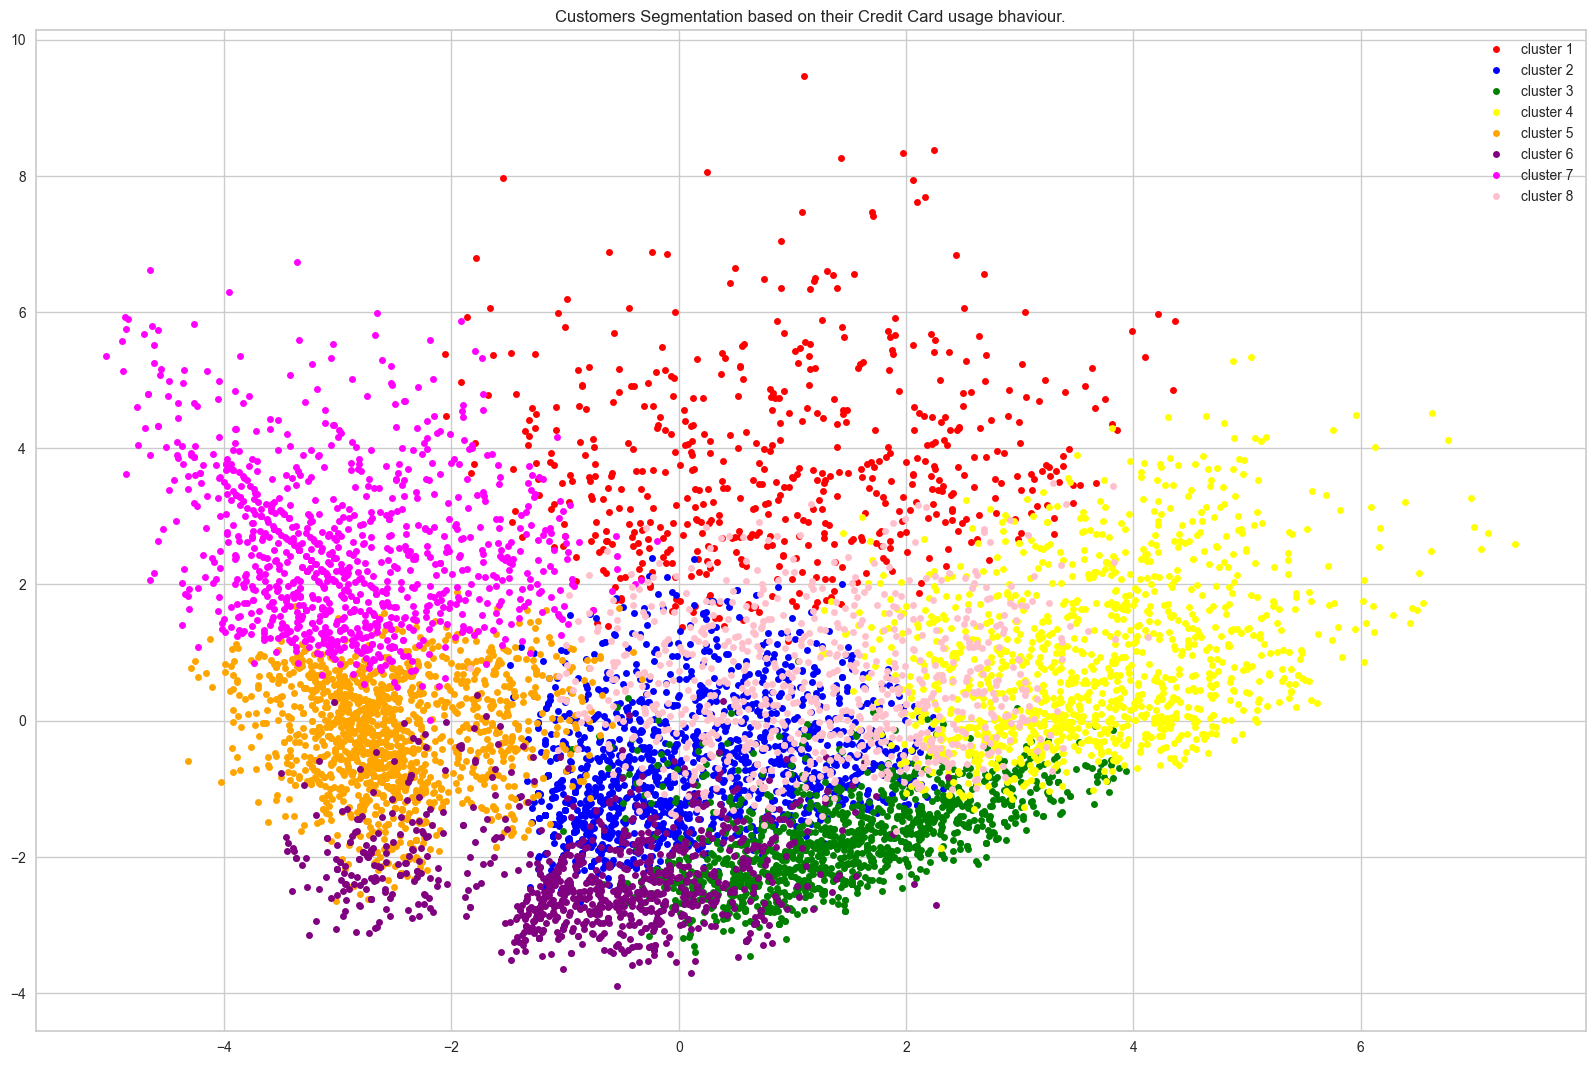

In [56]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6:'fuchsia',
          7:'pink'}

names = {i: f'cluster {i+1}' for i in range(k_clust)}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

Как мы видим, результат достаточно неочевидный, для более красивой визуализации вычислим косинусное расстояние от исходных данных и применим к ним PCA.

Напомним, что косинусное расстояние имеет вид: $$1 - \frac{u  v}{||u||||v||}$$
В модуле `sklearn.metrics.pairwise` реализовано вычитаемое в данной разнице в функции `cosine_similarity` предлагается реализовать функцию `cos_dist` косинусного расстояния на основе данной встроенной функции.

In [57]:
def cos_dist(X):
     return 1 - cosine_similarity(X) # здесь реализация

In [58]:
dist =cos_dist(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

### Задача 8.4 
С помощью атрибута `explained_variance_ratio_` выведите процент объясненной дисперсии по обоим из осей после применения **косинусного значения**. В качестве ответа внесите максимальное значение, округленное до десятых.

In [59]:
#ваш код

# Получаем процент объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_

# Выводим максимальное значение, округленное до десятых
max_explained_variance = max(explained_variance_ratio)
print(f"Максимальное значение объясненной дисперсии: {max_explained_variance:.1f}")

Максимальное значение объясненной дисперсии: 0.6


In [60]:
explained_variance_ratio

array([0.56896754, 0.2515564 ])

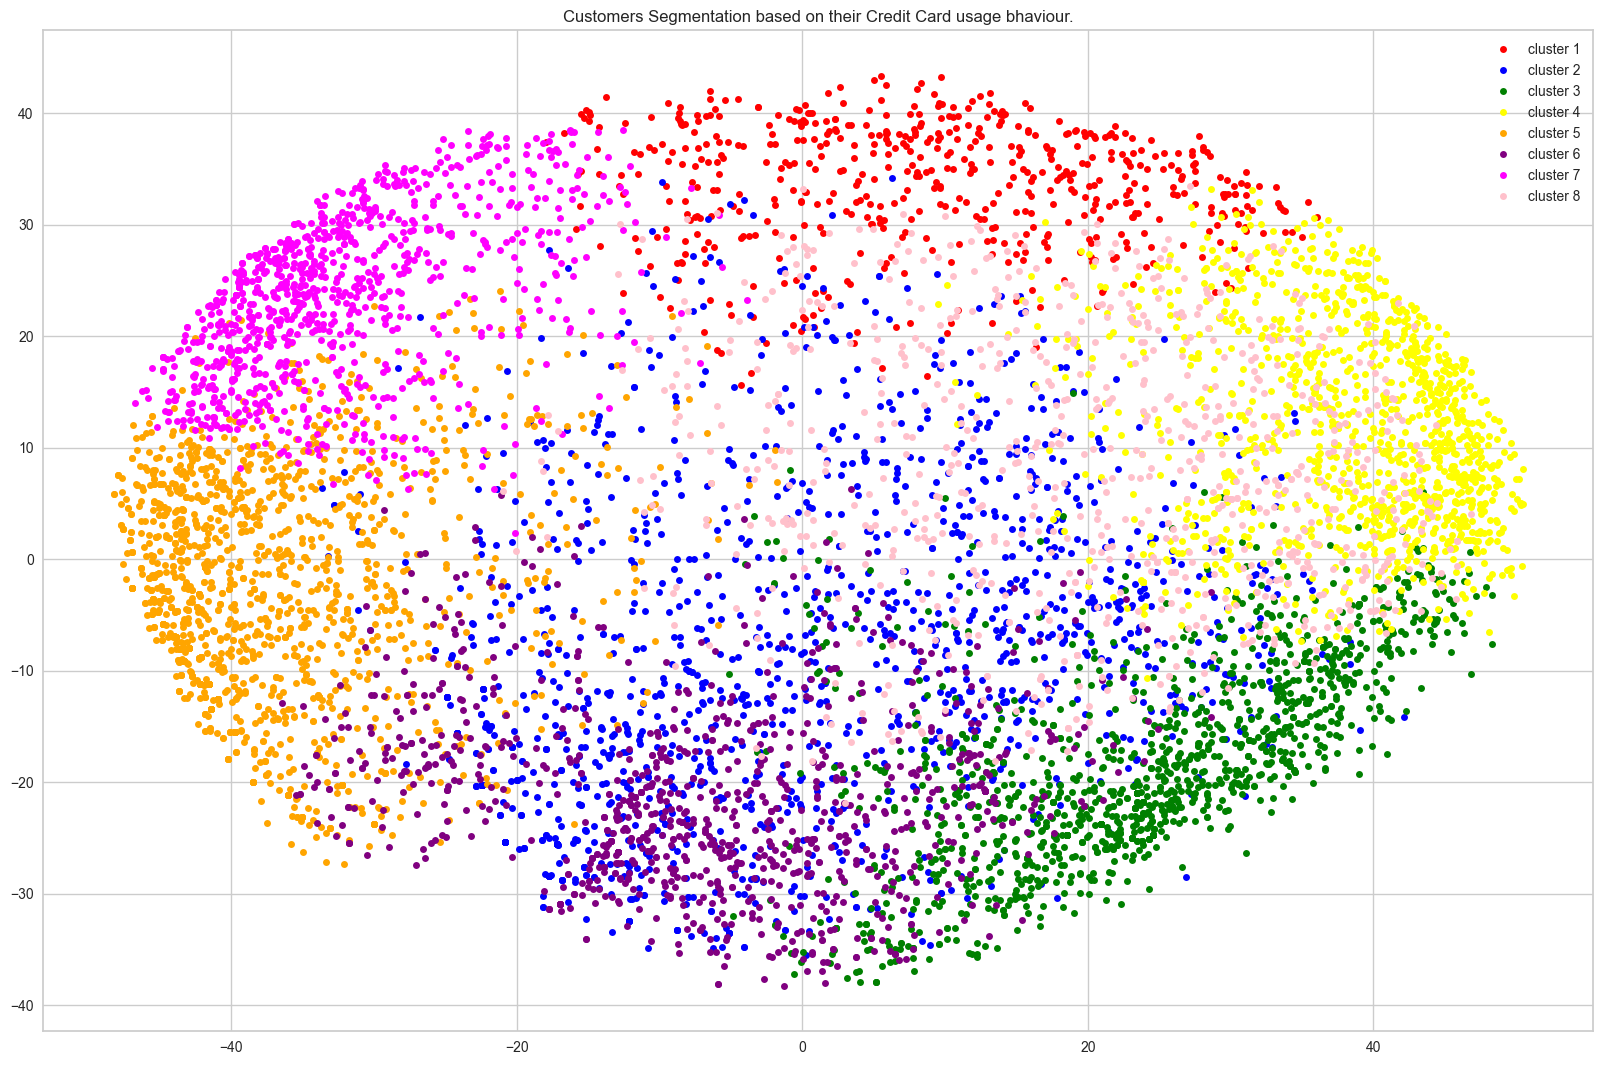

In [61]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6:'fuchsia',
          7:'pink'}

names = {i: f'cluster {i+1}' for i in range(k_clust)}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

Визуализация получилась гораздо разборчивее!

### Задача 8.5
Что вы можете сказать о визуализации кластеров после преобразования с помощью косинусного расстояния:
* ничего не изменилось
* кластера стали сильнее различимы
* картина кластеров приняла форму эллипса
* картина кластеров  приняла форму квадрата


## Выводы
В данном задании мы на практике:
* определили оптимальное количество кластеров
* решили задачу кластеризации
* попробовали описать характерные зависимости для каждого кластера
* попробовали снизить размерность до 2-х мерной с помощью PCA
* преобразовали данные для лучшей визуализации с помощью косинусного расстояния.